# Labs Access Analysis: 02 Stats Plot

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import os
import time
import warnings
import colorcet as cc
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
sns.set_context("poster")
sns.set_style("ticks")
matplotlib.rc('font', family='serif', serif='Fira Sans')

## Data investigation

In [3]:
url_data_labs = "data/labs.csv"

In [4]:
# create the directory with the data
if not os.path.exists('data'):
    os.makedirs('data') 
# create the directory where store the svg files
if not os.path.exists('svg'):
    os.makedirs('svg') 
# create the directory with the png files
if not os.path.exists('png'):
    os.makedirs('png')

load the data

In [5]:
data = pd.read_csv(url_data_labs)

show the first 5 rows

In [6]:
data.head(5)

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,URL 2
0,3D Incubator,Incubator-Accelerator,Barcelona,BCN,"Polígono Industrial de la, Avinguda Parc Logís...",8040.0,41.340036,2.123036,Manually added,https://www.incubator3d.org/,NaN,NaN
1,AKASHA Hub Barcelona,Hackerspace,Barcelona,BCN,"carrer de la verneda, 17 loc1",8018.0,41.411054,2.191146,Hackerspaces.org,https://wiki.hackerspaces.org/AKASHA_Hub_Barce...,NaN,NaN
2,Ateneu de Fabricació Ca L'Alier,Ateneu de Fabricació,Barcelona,BCN,"Carrer de Pere IV, 362",8019.0,41.410786,2.203873,Ajuntament.barcelona.cat,NaN,NaN,NaN
3,Ateneu de Fabricació Ciutat Meridiana,Ateneu de Fabricació,Barcelona,BCN,"Av. de Rasos de Peguera, 232",8033.0,41.460460,2.169872,Ajuntament.barcelona.cat,https://ajuntament.barcelona.cat/ateneusdefabr...,NaN,NaN
4,Ateneu de Fabricació Gràcia,Ateneu de Fabricació,Barcelona,BCN,Carrer Perill 8,8012.0,41.399364,2.161167,Ajuntament.barcelona.cat,https://ajuntament.barcelona.cat/ateneusdefabr...,NaN,NaN


### description of the fields of the dataset
|  field name | description | details   |
|---|---|---|
| Name | name of the lab | |
| Type | type of Fablab. | *Fab Lab, Service, Makerspace, DIYBio Lab, Ateneu de Fabricació, City Space, Library, FabCafè, Incubator/Accelerator. Foundation* | 
| Cluster | which cluster the lab belongs to (Barcelona or Milan) | *BCN, MI* |
| Address | The house number where the lab is located | |
| CAP | the zipcode of the address | | 
| Lat | the latitude expressed in decimal degree | | 
| Long | the longitude expressed in decimal degree | |
| Source | where the information was collected from | *fablabs.io, hackerspaces.org, makerspaces.make.co, ajuntament.barcelona.cat, sphere.diybio.org, manually added, ajuntament de Barcelona policy document* | 
| URL | the web address of the lab | | 
| Notes | some information notes.  |the only note is if the lab has been closed (*Closed*), otherwise nothing appears. | 

### data investigation

In [7]:
data["Notes"].describe()

count         11
unique         2
top       Closed
freq          10
Name: Notes, dtype: object

In [8]:
data["Notes"].value_counts()

Closed                        10
City Manufacturing network     1
Name: Notes, dtype: int64

### Analysis - Type of Labs

In [9]:
data["Type"].describe()

count          87
unique         20
top       Fab Lab
freq           18
Name: Type, dtype: object

In [10]:
data["Type"].value_counts()

Fab Lab                                                                    18
Makerspace                                                                 12
University Lab                                                              8
Barcelona Recircula – Tool Library / Repair Cafè                            7
City Space                                                                  6
Hackerspace                                                                 6
Ateneu de Fabricació                                                        5
Incubator-Accelerator                                                       4
Service                                                                     4
DIYBio Lab                                                                  3
Foundation                                                                  3
Repair Cafè                                                                 3
Library                                                         

plot the data

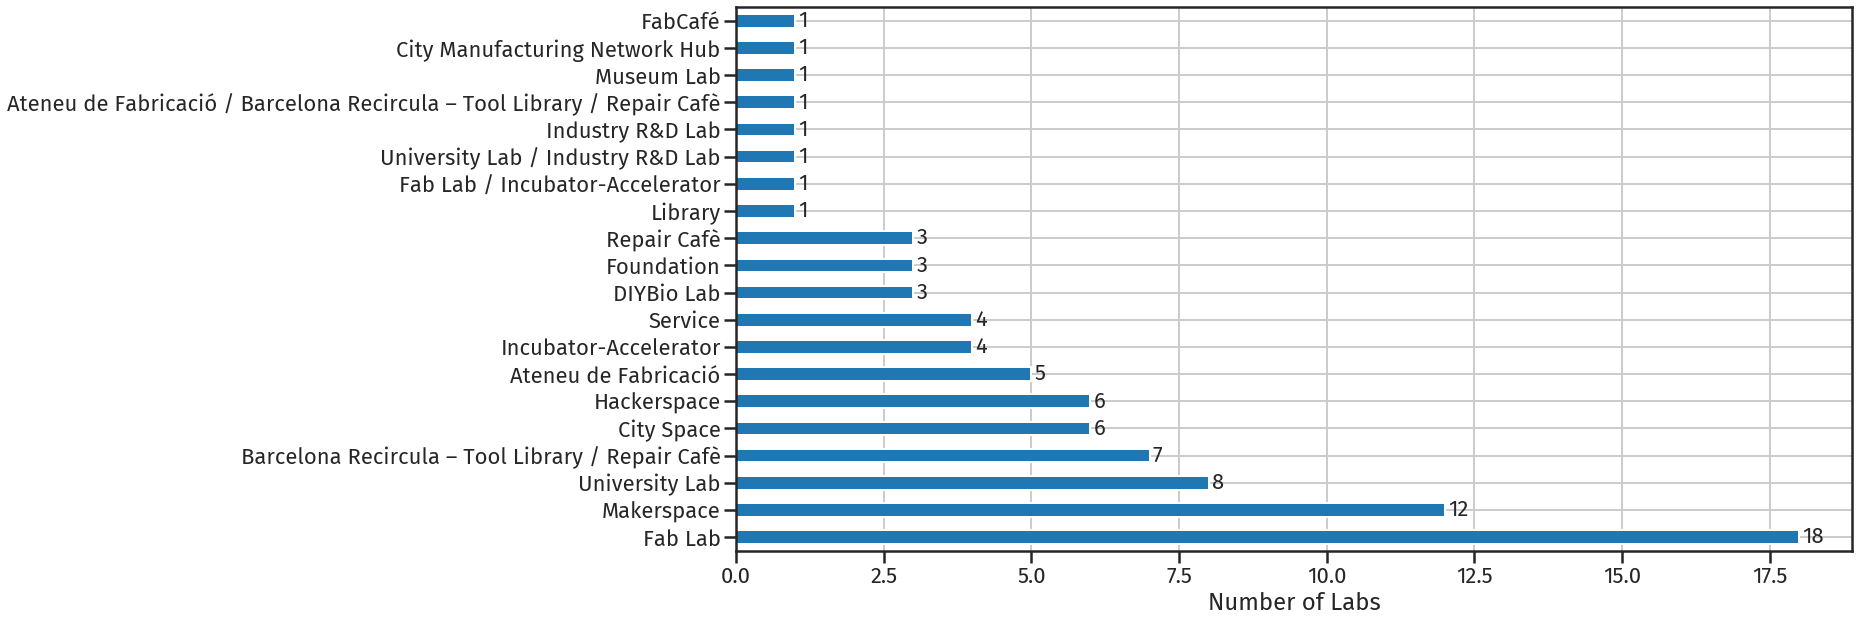

In [11]:
ax = data["Type"].value_counts().plot(kind="barh", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=22, padding=3)
plt.xlabel('Number of Labs')
plt.savefig("svg" + os.sep + "labs_type.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_type.png", dpi=300, bbox_inches="tight")
plt.grid()

### Analysis - Cities

In [12]:
data["Cluster"].describe()

count      87
unique      2
top       BCN
freq       59
Name: Cluster, dtype: object

In [13]:
data["Cluster"].value_counts()

BCN    59
MI     28
Name: Cluster, dtype: int64

In [14]:
# Labs in the metropolitan area of Barcelona
data.loc[(data['City'] != "Barcelona") & (data['Cluster'] == "BCN")]

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,URL 2
10,BDN Lab,Fab Lab,Badalona,BCN,"Carrer del General Weyler, 128",8912.0,41.442801,2.238115,Manually added,https://bdnlab.org/,NaN,NaN
17,Disseny Lab UAB,University Lab,Cerdanyola del Vallès,BCN,"C/ Sitges S/N. Escola Enginyeria, Universitat ...",8193.0,41.500687,2.111429,Manually added,https://www.uab.cat/web/espacios/disseny-lab/e...,NaN,NaN
22,EspluLab,City Space,Esplugues de Llobregat,BCN,"Carrer de la Riba, 36",8950.0,41.376204,2.090414,Manually added,https://www.esplugues.cat/esplulab,NaN,NaN
24,Fab Lab Sant Cugat,Fab Lab,Sant Cugat del Vallès,BCN,"Avinguda de la Torre Blanca, 57",8712.0,41.467569,2.091704,Fablabs.io,NaN,NaN,NaN
25,Fab Lab Tinkerers,Fab Lab,Castelldefels,BCN,"PMT-UPC, RDIT Building, C/Esteve Terradas, 1",8860.0,41.276201,1.988951,Fablabs.io,https://fablabs.io/labs/Tinkerers,Closed,NaN
33,Green Fab Lab,Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN,NaN
34,HP 3D Printing and Digital Manufacturing Cente...,Industry R&D Lab,Sant Cugat del Vallès,BCN,Cami de Can Graells 1-21 (Bldg BCN01),8174.0,41.493650,2.062887,Manually added,https://press.hp.com/us/en/press-releases/2019...,NaN,NaN
70,W!LAB,Fab Lab,Viladecans,BCN,"Parc de Can Xic, 1",8840.0,41.315678,2.014245,Fablabs.io,https://fablabs.io/labs/wilab,NaN,NaN


In [15]:
data.loc[(data['City'] != "Barcelona") & (data['Cluster'] == "BCN")].describe()

,CAP,Lat,Long
count,8.000000,8.000000,8.000000
mean,8616.375000,41.415398,2.091398
std,337.780122,0.083624,0.076491
min,8174.000000,41.276201,1.988951
25%,8265.750000,41.361073,2.050727
50%,8776.000000,41.446597,2.091059
75%,8873.000000,41.474089,2.116932
max,8950.000000,41.500687,2.238115


In [16]:
# Labs in the metropolitan area of Milan
data.loc[(data['City'] != "Milano") & (data['Cluster'] == "MI")]

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,URL 2
49,Multilab Rozzano,Fab Lab,Rozzano,MI,Via Matteotti 33,20089.0,45.376219,9.145410,Fablabs.io,https://fablabs.io/labs/multilabrozzano,NaN,NaN
62,Share Makerspace,Makerspace,Cusano Milanino,MI,"Via Giuseppe Zucchi, 39/G/Interno 20",20095.0,45.560405,9.177185,Manually added,https://www.sharemakers.it/,NaN,NaN


In [17]:
data.loc[(data['City'] != "Milano") & (data['Cluster'] == "MI")].describe()

,CAP,Lat,Long
count,2.000000,2.000000,2.000000
mean,20092.000000,45.468312,9.161297
std,4.242641,0.130239,0.022468
min,20089.000000,45.376219,9.145410
25%,20090.500000,45.422265,9.153354
50%,20092.000000,45.468312,9.161297
75%,20093.500000,45.514358,9.169241
max,20095.000000,45.560405,9.177185


In [18]:
data["City"].value_counts()

Barcelona                 51
Milano                    26
Cerdanyola del Vallès      2
Sant Cugat del Vallès      2
Badalona                   1
Esplugues de Llobregat     1
Castelldefels              1
Rozzano                    1
Cusano Milanino            1
Viladecans                 1
Name: City, dtype: int64

In [19]:
data.groupby(["Cluster", "City"]).count()["Name"]

Cluster  City                  
BCN      Badalona                   1
         Barcelona                 51
         Castelldefels              1
         Cerdanyola del Vallès      2
         Esplugues de Llobregat     1
         Sant Cugat del Vallès      2
         Viladecans                 1
MI       Cusano Milanino            1
         Milano                    26
         Rozzano                    1
Name: Name, dtype: int64

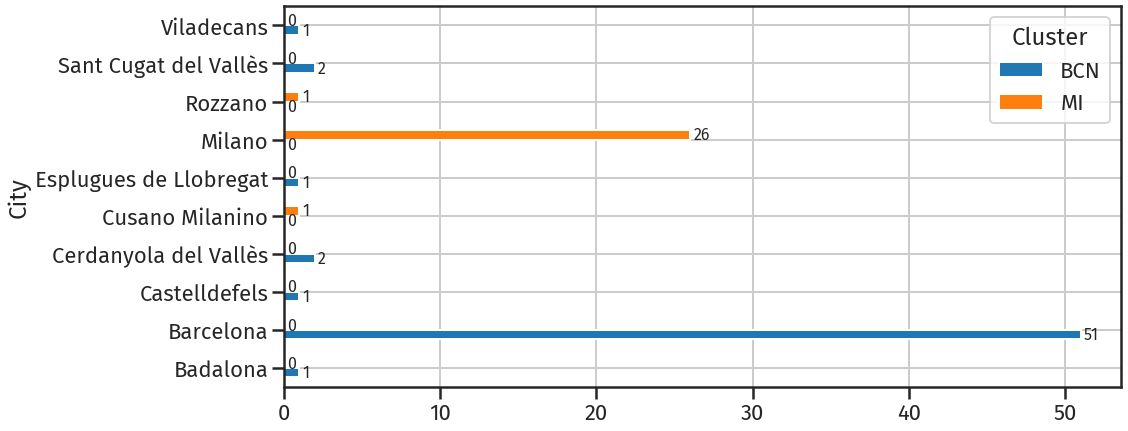

In [20]:
ax = data.groupby(["Cluster", "City"]).size().unstack().T.plot(kind="barh",figsize=(15,7))
ax.bar_label(ax.containers[0], fmt="%d", size=16, padding=3)
ax.bar_label(ax.containers[1], fmt="%d", size=16, padding=3)
plt.grid()
plt.savefig("svg" + os.sep + "labs_city_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_city_cluster.png", dpi=300, bbox_inches="tight")

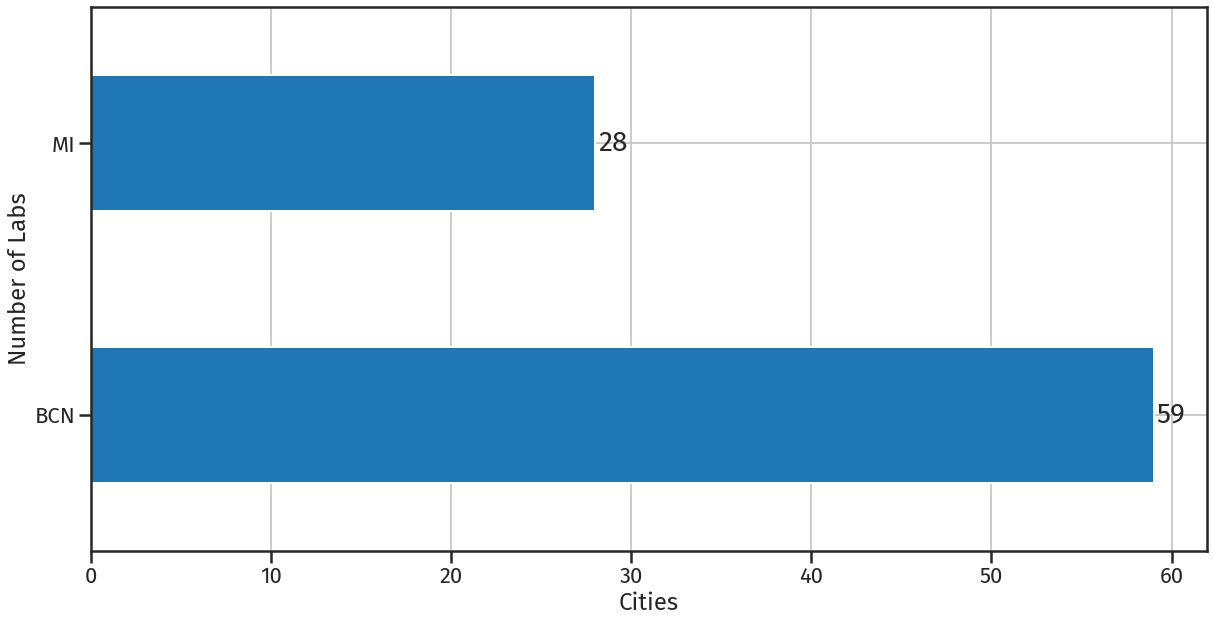

In [21]:
ax = data["Cluster"].value_counts().plot(kind="barh", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Cities')
plt.ylabel('Number of Labs')
plt.grid()
plt.savefig("svg" + os.sep + "labs_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_cluster.png", dpi=300, bbox_inches="tight")

### Labs Type by Cluster (City)

In [22]:
gp = data.groupby('Cluster')
gp["Type"].sum()

Cluster
BCN    Incubator-AcceleratorHackerspaceAteneu de Fabr...
MI     Fab LabFab LabFab Lab / Incubator-AcceleratorF...
Name: Type, dtype: object

In [23]:
data.groupby(['Cluster','Type']).size()

Cluster  Type                                                                   
BCN      Ateneu de Fabricació                                                        5
         Ateneu de Fabricació / Barcelona Recircula – Tool Library / Repair Cafè     1
         Barcelona Recircula – Tool Library / Repair Cafè                            7
         City Space                                                                  6
         DIYBio Lab                                                                  2
         Fab Lab                                                                    11
         FabCafé                                                                     1
         Foundation                                                                  3
         Hackerspace                                                                 4
         Incubator-Accelerator                                                       4
         Industry R&D Lab                        

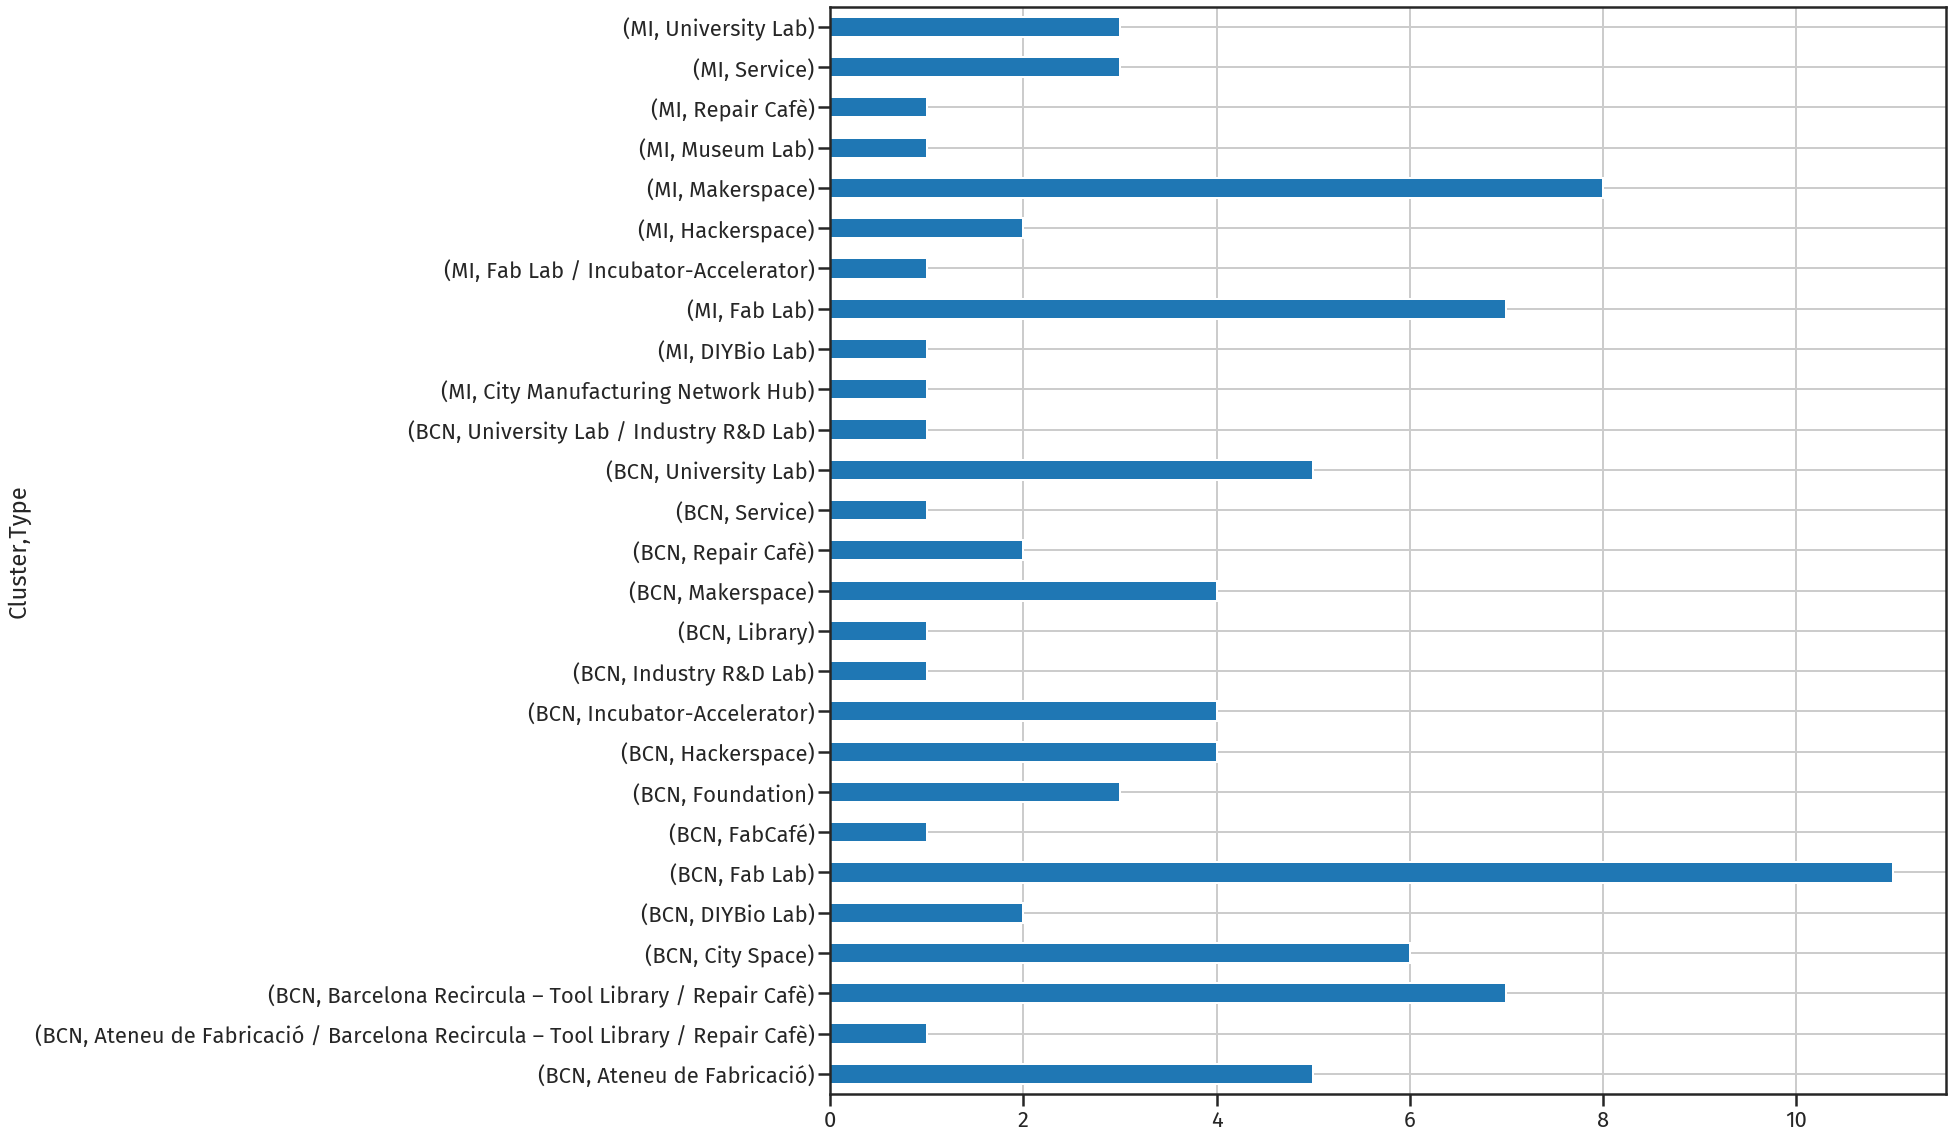

In [24]:
data.groupby(['Cluster','Type']).size().plot(kind="barh", figsize=(20,20))
plt.grid()
plt.show()

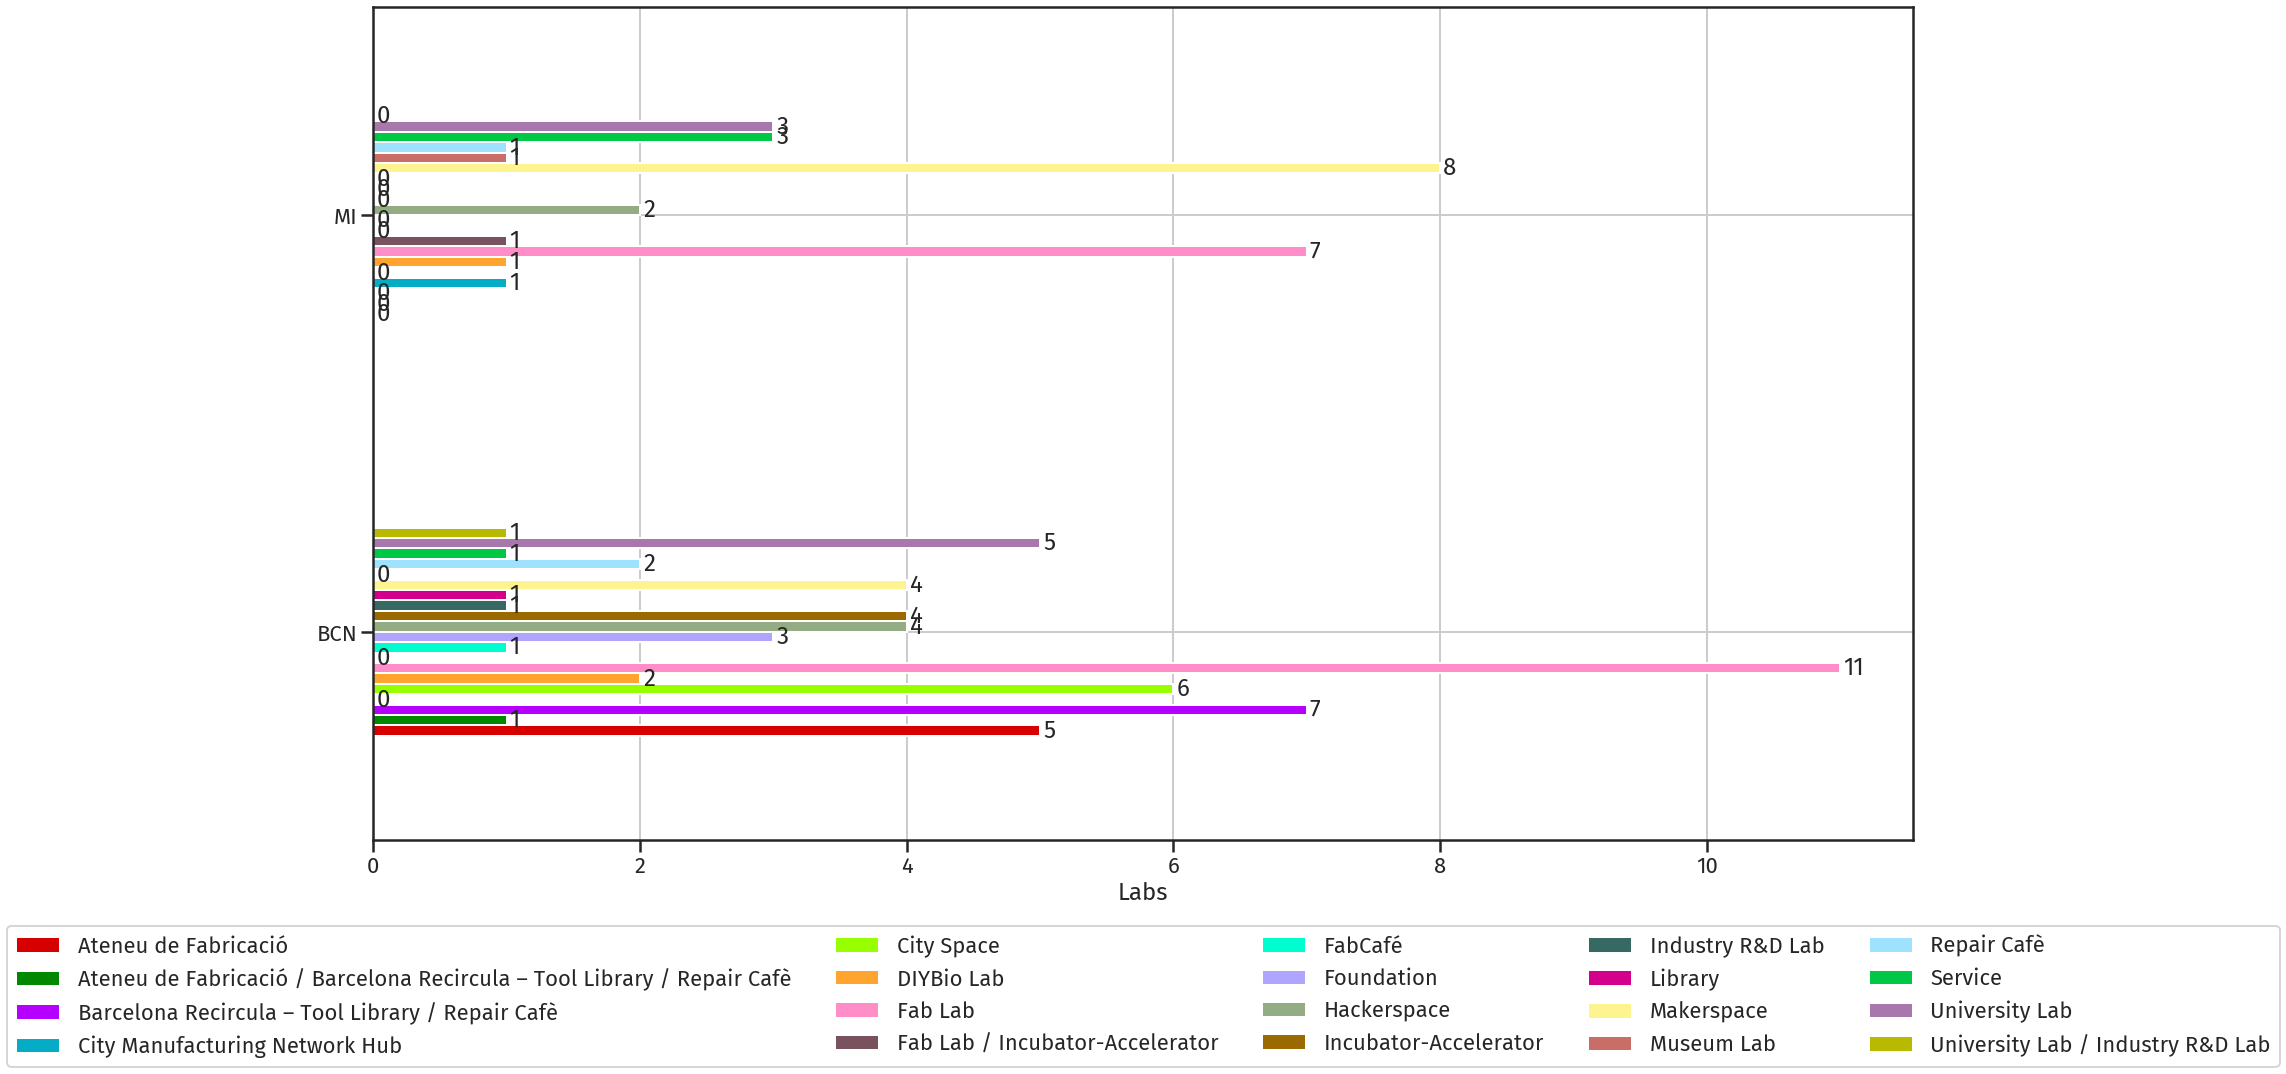

In [25]:
ax = data.groupby(['Cluster','Type']).size().unstack().plot(kind='barh', figsize=(30,15), color=sns.color_palette(cc.glasbey_light, len(data.groupby(['Cluster','Type']))))
for xx in ax.containers:
    ax.bar_label(xx, fmt="%d", size=24, padding=3)
plt.xlabel('City')
plt.xlabel('Labs')
ax.set_ylabel('')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=5)
plt.grid()
plt.tight_layout()
plt.savefig("svg" + os.sep + "labs_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_cluster.png", dpi=300, bbox_inches="tight")

two plots together

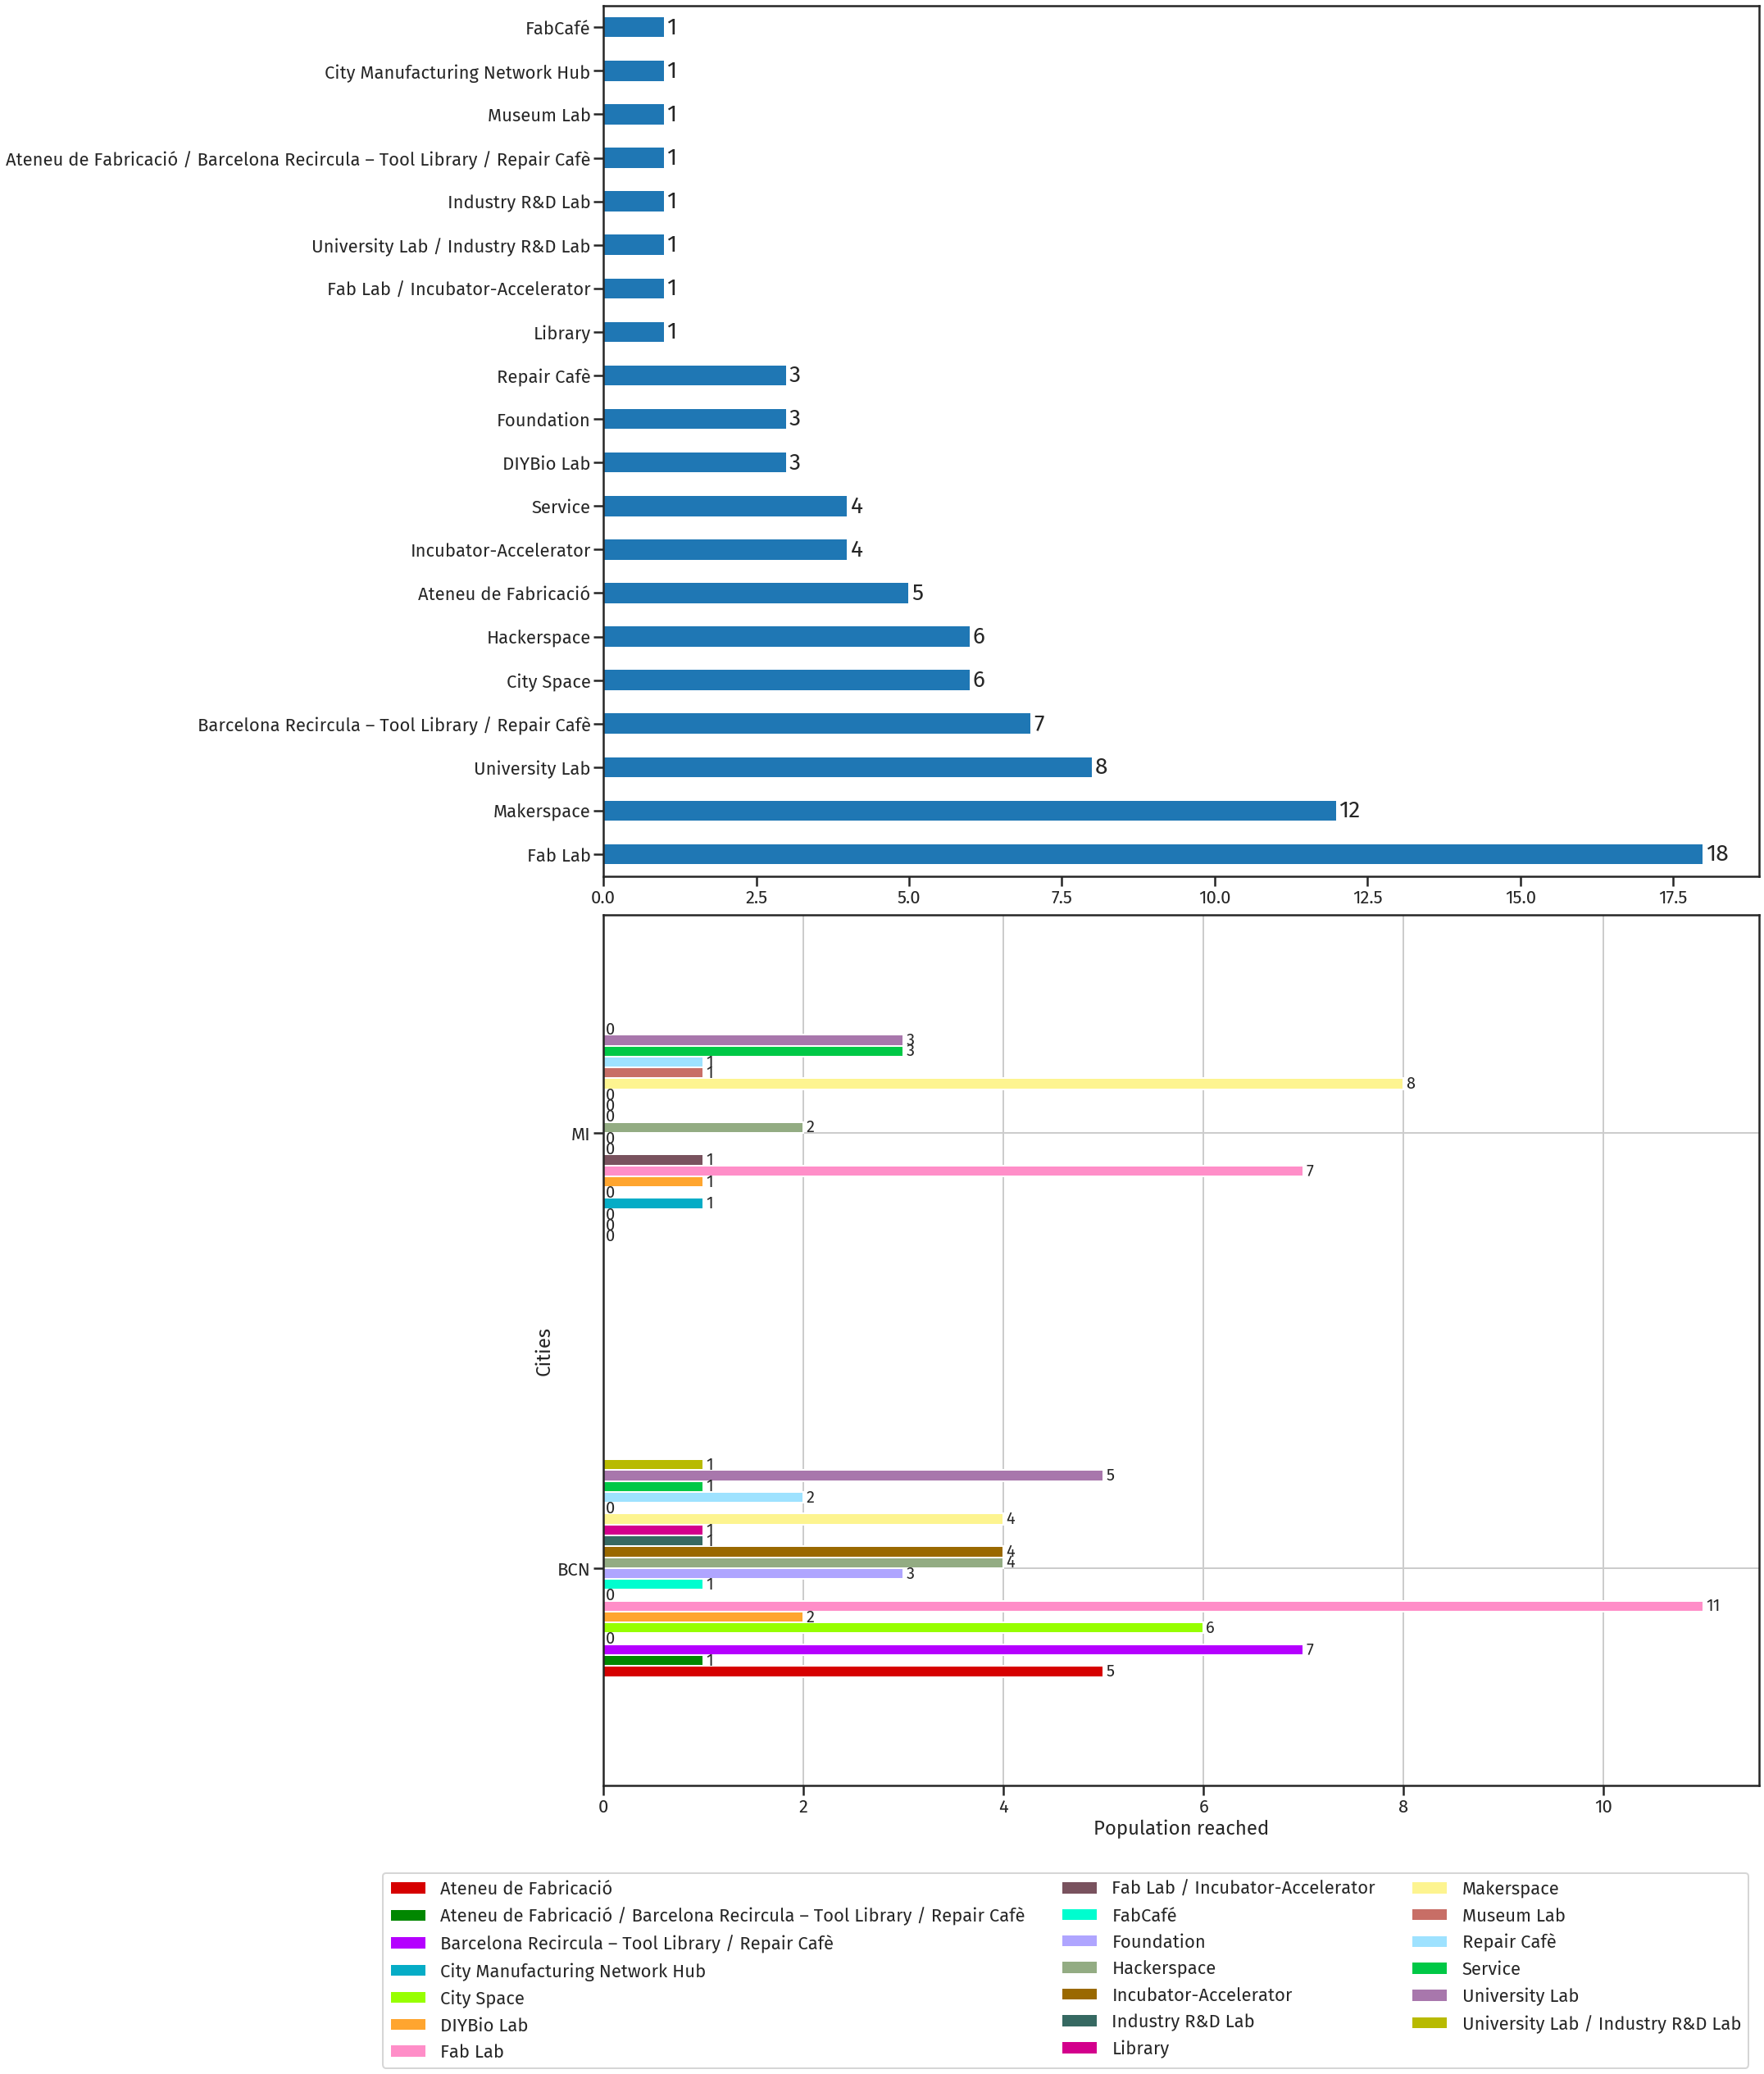

In [26]:
figure, axes = plt.subplots(2, 1, figsize=(30,35))
data["Type"].value_counts().plot(ax=axes[0], kind="barh", legend=False)
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=28, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('')
plt.grid()

data.groupby(['Cluster','Type']).size().unstack().plot(ax=axes[1], kind="barh", color=sns.color_palette(cc.glasbey_light, len(data.groupby(['Cluster','Type']))))
plt.legend(loc='upper center', bbox_to_anchor=(0.4, -0.09), ncol=3)
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=20, padding=3)
#plt.xlabel('City')
#plt.xlabel('Labs')

axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('Cities')

#axes[1].legend(loc='upper center', bbox_to_anchor=(0.05, -0.09), ncol=5)

plt.grid()
plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_number_subplot.svg", bbox_inches='tight')

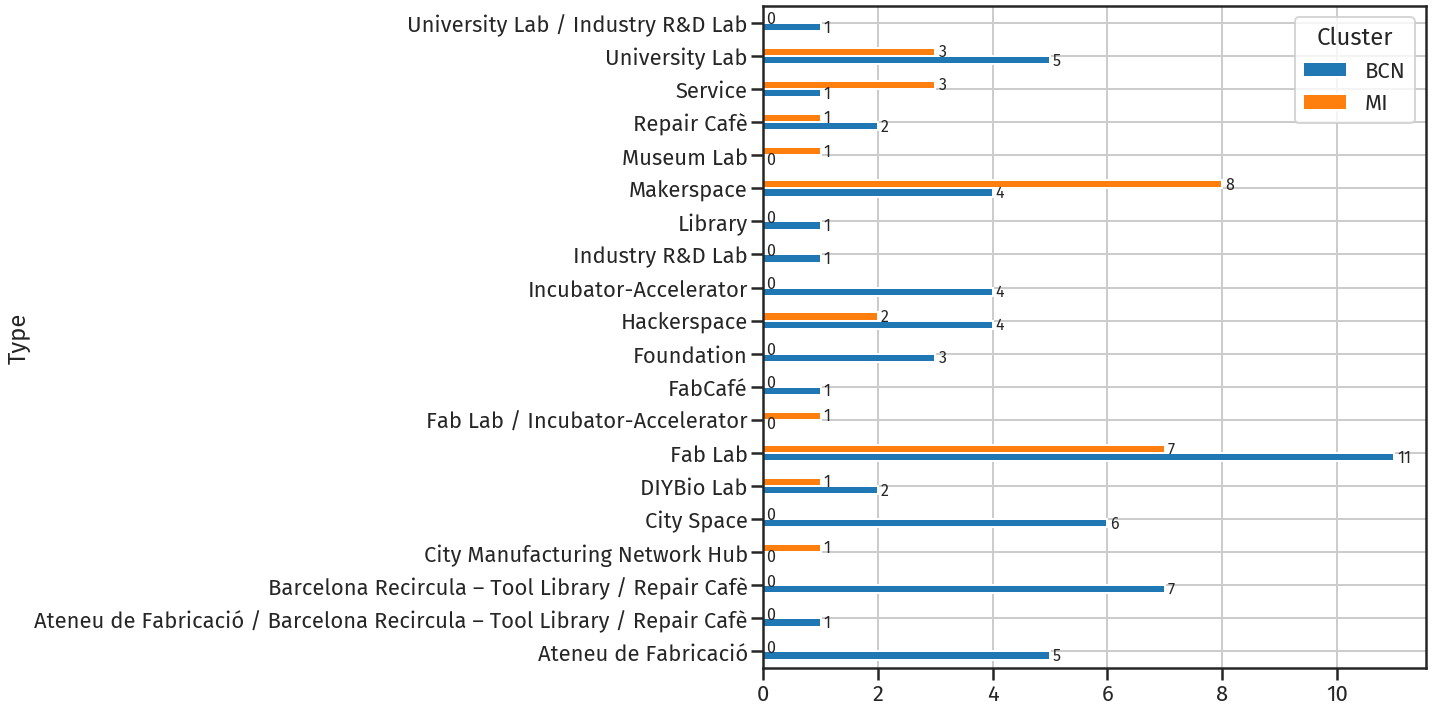

In [27]:
ax = data.groupby(['Cluster','Type']).size().unstack().T.plot(kind="barh", figsize=(20,10))
for xx in ax.containers:
    ax.bar_label(xx, fmt="%d", size=16, padding=3)
axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('Cities')
plt.grid()
plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_together_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_together_number_subplot.svg", bbox_inches='tight')

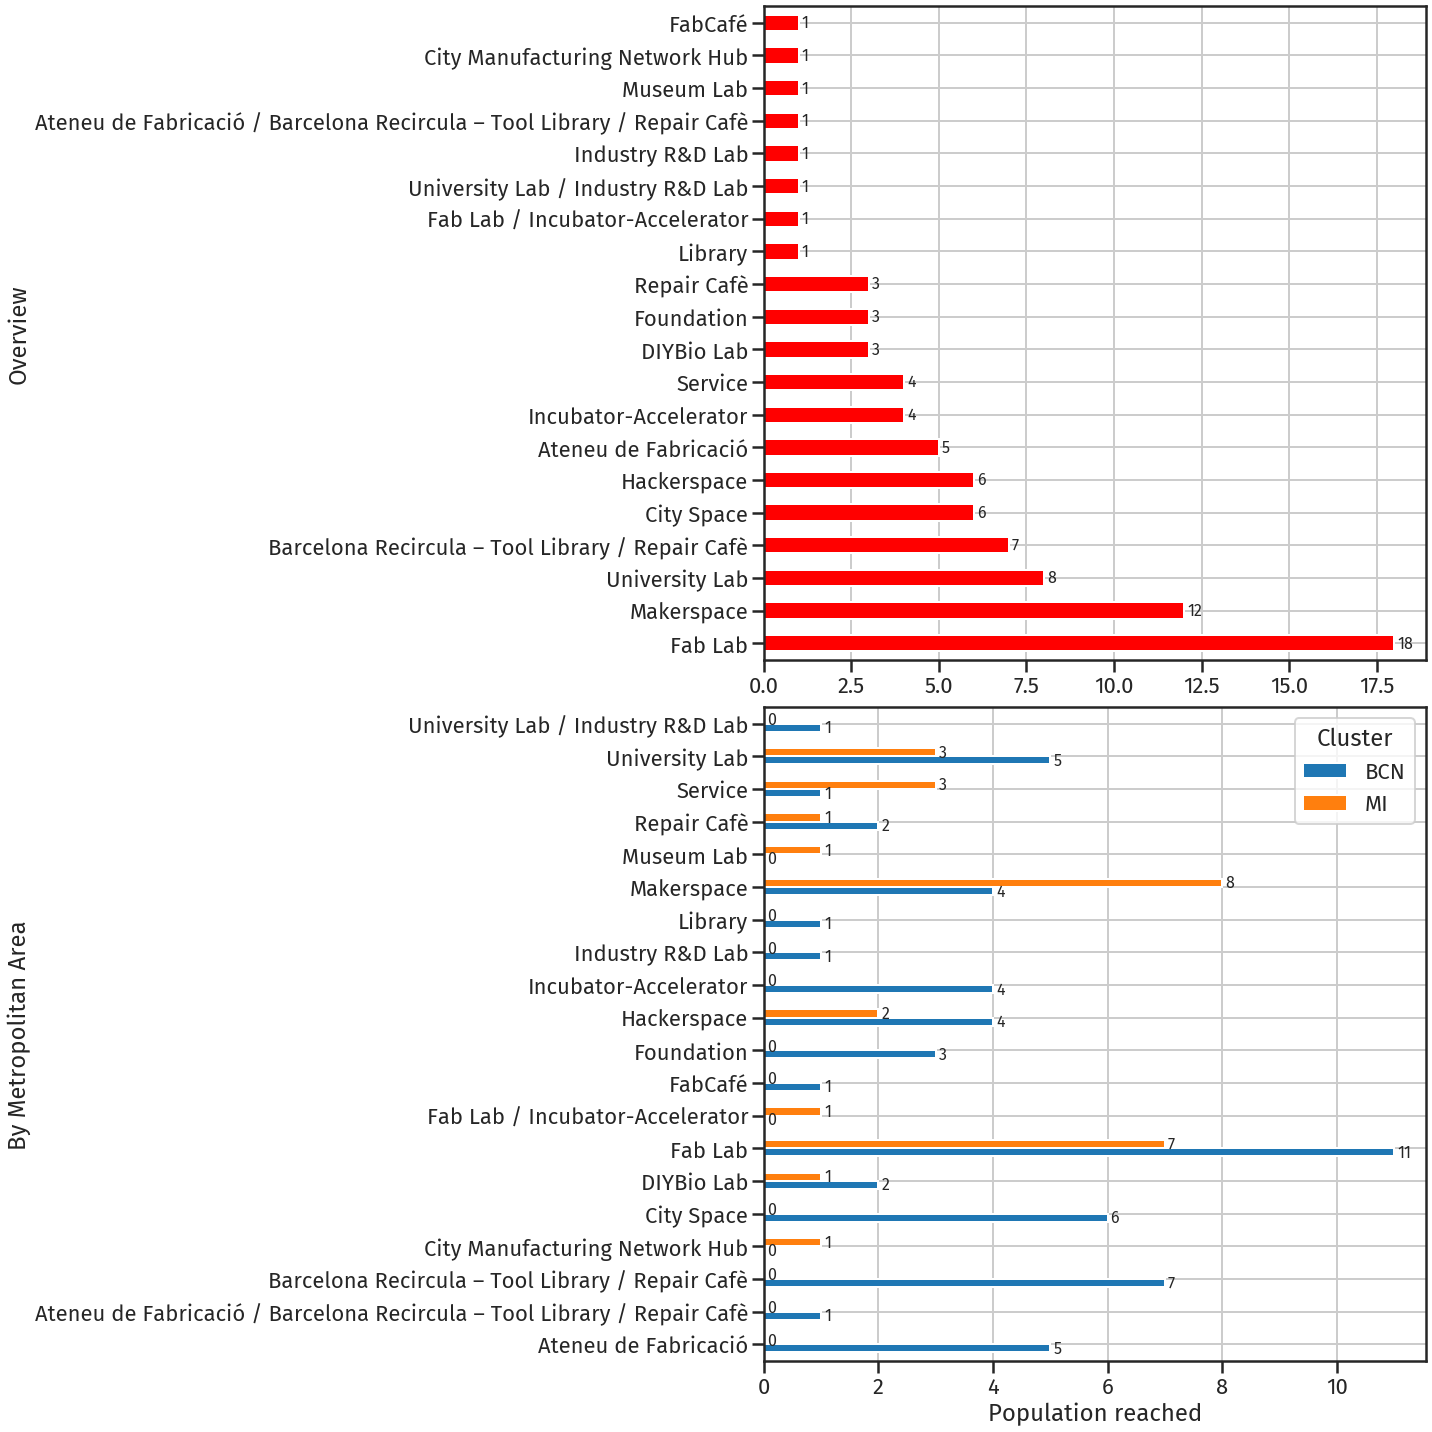

In [28]:
figure, axes = plt.subplots(2, 1, figsize=(20,20))
data["Type"].value_counts().plot(ax=axes[0], kind="barh", legend=False, color="r")
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=16, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('Overview')
axes[0].grid()

ax = data.groupby(['Cluster','Type']).size().unstack().T.plot(ax=axes[1], kind="barh")
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=16, padding=3)

axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('By Metropolitan Area')
axes[1].grid()

plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_together_overview_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_together_overview_number_subplot.svg", bbox_inches='tight')

In [29]:
data['Source'].describe()

count                 87
unique                16
top       Manually added
freq                  24
Name: Source, dtype: object

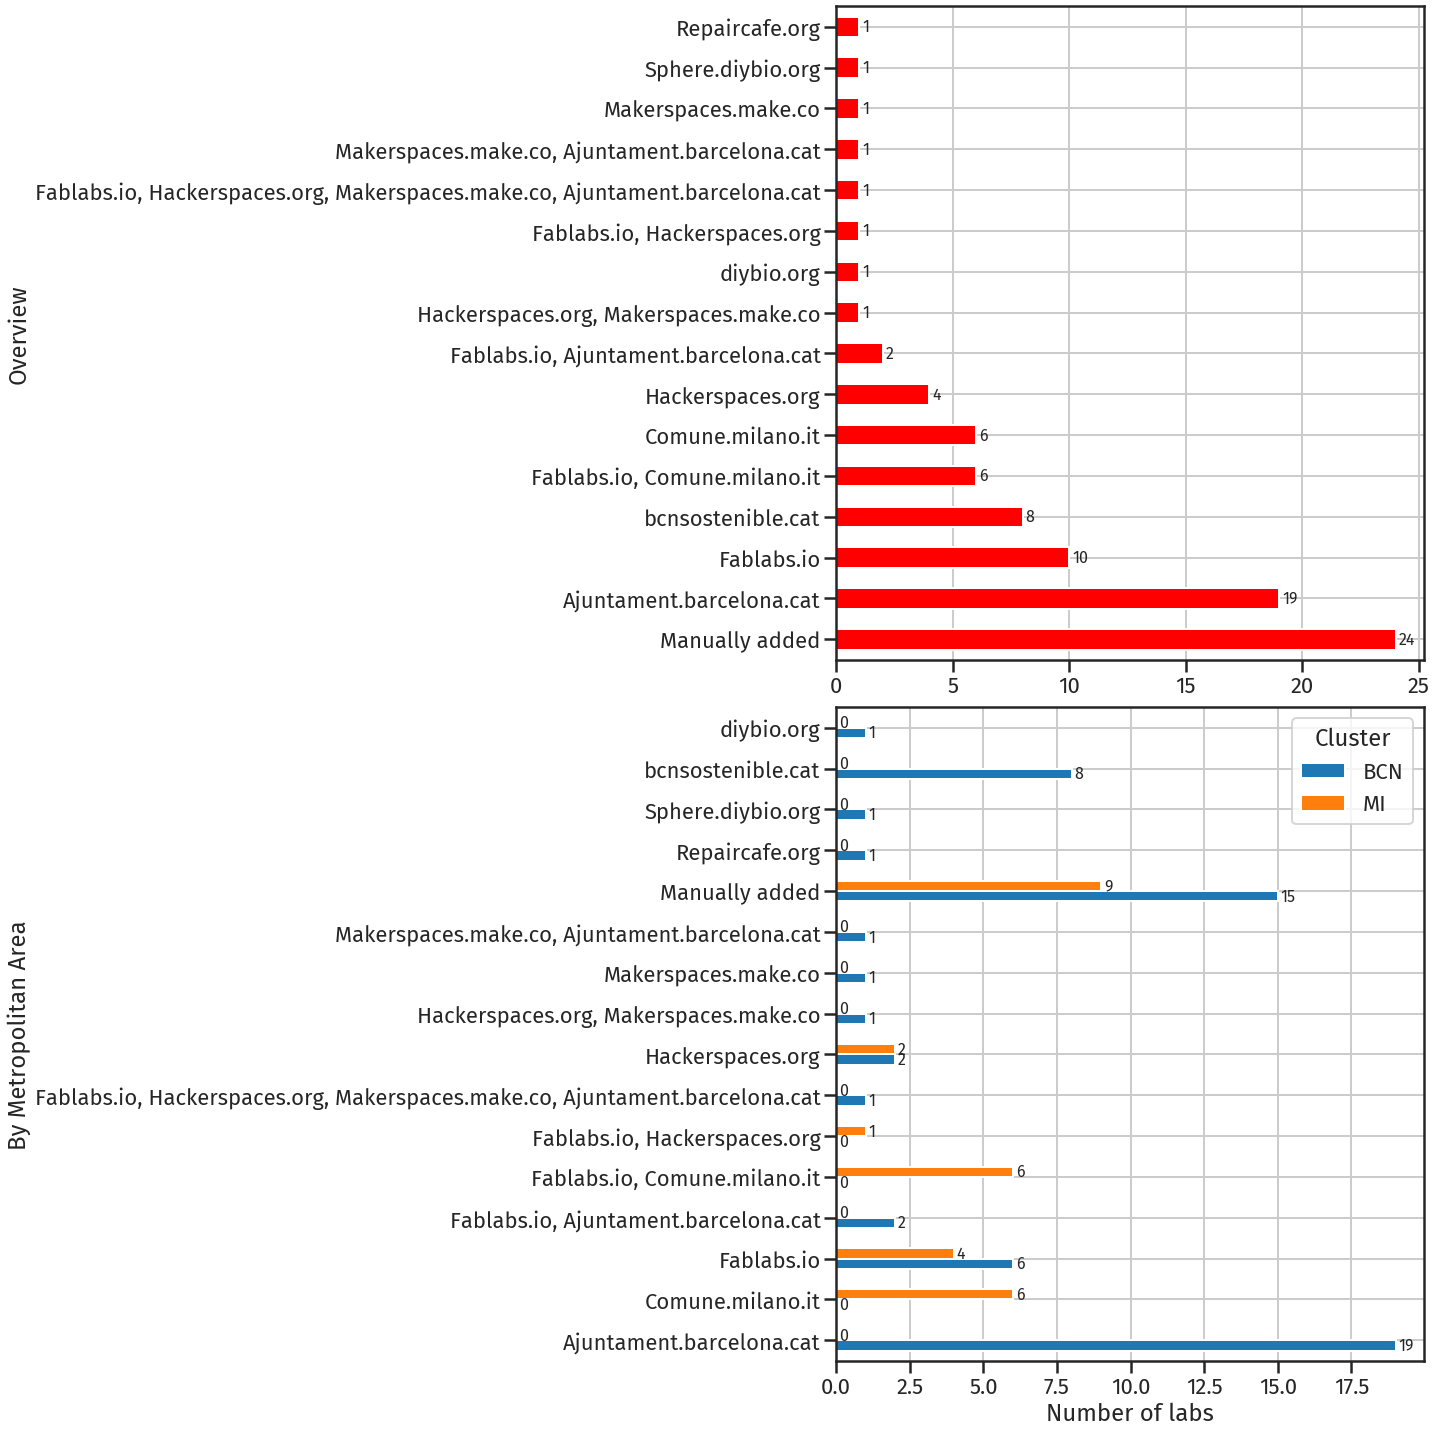

In [30]:
figure, axes = plt.subplots(2, 1, figsize=(20,20))
data["Source"].value_counts().plot(ax=axes[0], kind="barh", legend=False, color="r")
axes[0].bar_label(axes[0].containers[0], fmt="%d", size=16, padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('Overview')
axes[0].grid()

ax = data.groupby(['Cluster','Source']).size().unstack().T.plot(ax=axes[1], kind="barh")
for xx in axes[1].containers:
    axes[1].bar_label(xx, fmt="%d", size=16, padding=3)

axes[1].set_xlabel('Number of labs')
axes[1].set_ylabel('By Metropolitan Area')
axes[1].grid()

plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_source_together_overview_number_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita__source_together_overview_number_subplot.svg", bbox_inches='tight')

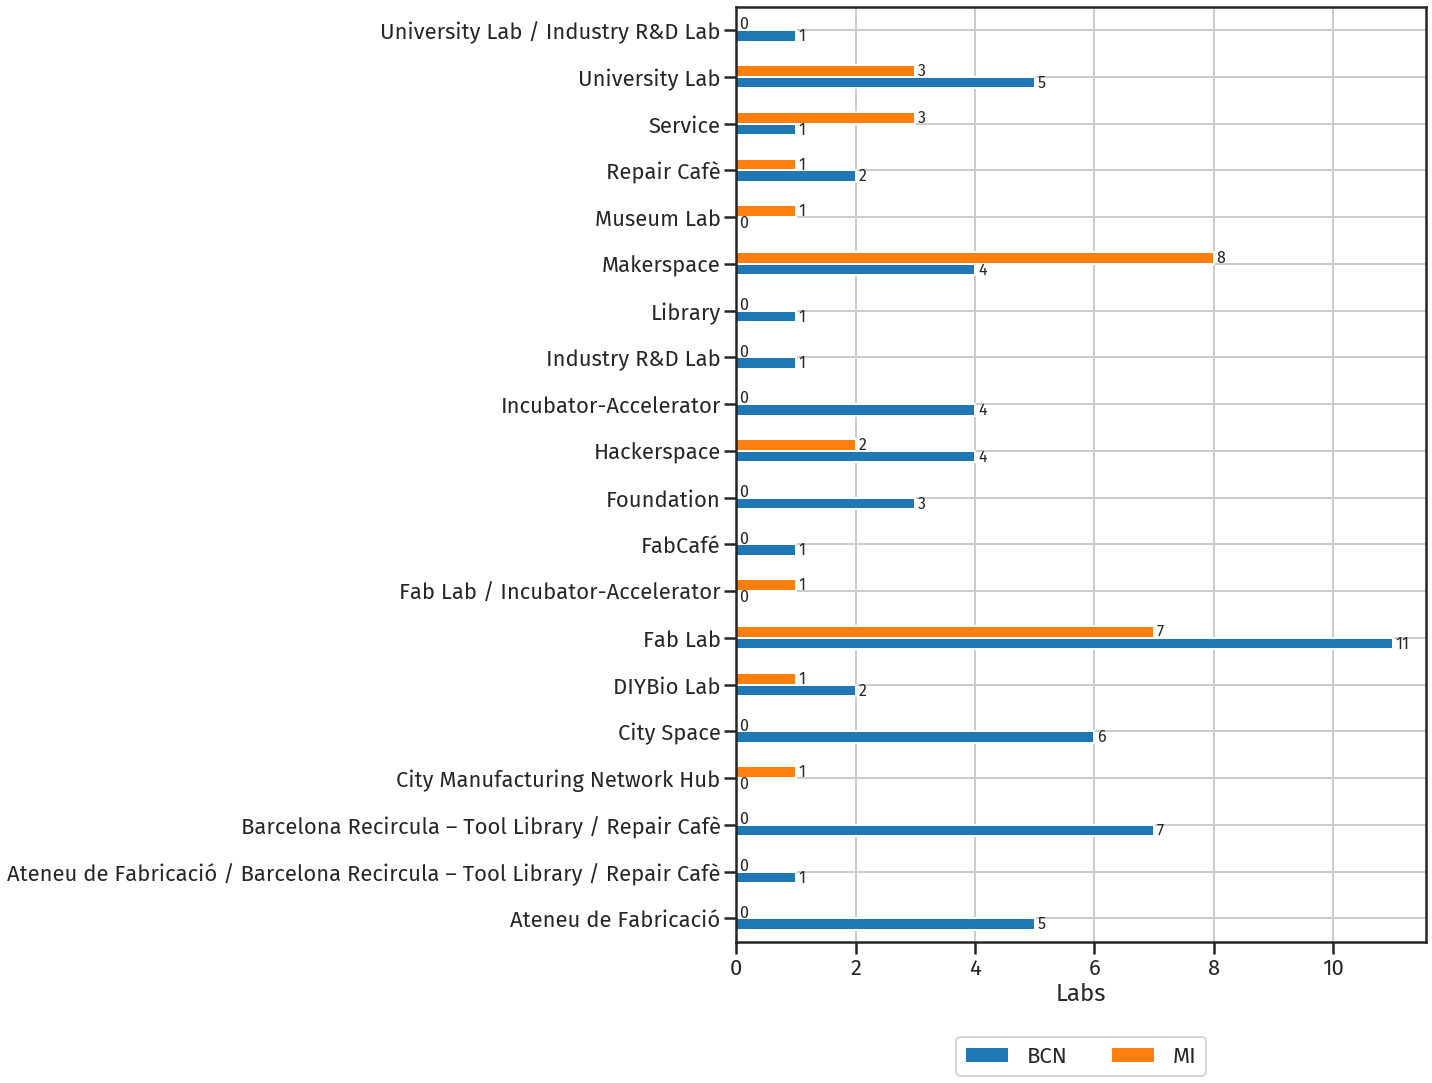

In [31]:
ax = data.groupby(['Cluster','Type']).size().unstack().T.plot(kind='barh', figsize=(20,15))
for xx in ax.containers:
    ax.bar_label(xx, fmt="%d", size=16, padding=3)
plt.xlabel('City')
plt.xlabel('Labs')
ax.set_ylabel('')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=5)
plt.grid()
plt.tight_layout()
plt.savefig("svg" + os.sep + "labs_by_cluster.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_by_cluster.png", dpi=300, bbox_inches="tight")